<a href="https://colab.research.google.com/github/PonomarenkoOleksandrV/Housing-Analysis-SQL-Tableau-Python/blob/main/notebooks/final_cleaned_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from google.colab import auth
auth.authenticate_user()
print('Авторизація успішна!')

Авторизація успішна!


In [42]:
from google.cloud import bigquery
import pandas as pd

#ID проєкту
project_id = 'house-market-analysis-482812'
client = bigquery.Client(project=project_id)

query = """
SELECT
    *
FROM `house-market-analysis-482812.real_estate_analysis.house_prices_final`
"""
df = client.query(query).to_dataframe()

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,165,40,RM,40,5400,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,10,2007,WD,Normal,152000
1,590,40,RM,50,9100,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,Shed,600,8,2008,WD,Normal,79500
2,874,40,RL,60,12144,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,Othr,0,9,2009,WD,Normal,133000
3,1271,40,RL,NA,23595,Pave,NA,Reg,Low,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,260000
4,1333,20,RL,67,8877,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2009,WD,Normal,100000


In [43]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.89726,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.0,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.75,20.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,9478.5,6.0,5.0,1973.0,1994.0,383.5,0.0,477.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.25,70.0,11601.5,7.0,6.0,2000.0,2004.0,712.25,0.0,808.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,1474.0,2336.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [45]:

df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')
df['MoSold'] = pd.to_datetime(df['MoSold'], format='%m')

In [46]:
df.dtypes

,0
Id,Int64
MSSubClass,Int64
MSZoning,object
LotFrontage,object
LotArea,Int64
...,...
MoSold,datetime64[ns]
YrSold,datetime64[ns]
SaleType,object
SaleCondition,object


In [47]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460,1460,1460.0
mean,730.5,56.89726,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,1900-06-10 19:28:46.027397376,2007-10-26 02:25:58.356164352,180921.19589
min,1.0,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-01-01 00:00:00,2006-01-01 00:00:00,34900.0
25%,365.75,20.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-05-01 00:00:00,2007-01-01 00:00:00,129975.0
50%,730.5,50.0,9478.5,6.0,5.0,1973.0,1994.0,383.5,0.0,477.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,1900-06-01 00:00:00,2008-01-01 00:00:00,163000.0
75%,1095.25,70.0,11601.5,7.0,6.0,2000.0,2004.0,712.25,0.0,808.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,1900-08-01 00:00:00,2009-01-01 00:00:00,214000.0
max,1460.0,190.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,1474.0,2336.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,1900-12-01 00:00:00,2010-01-01 00:00:00,755000.0
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,NaN,NaN,79442.502883


In [48]:
# Рахуємо кількість кропущених значеннь у кожній колонці
mitssing_coun = df.isnull().sum()
print(mitssing_coun)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [49]:
# очищаємо дані по окремих стовпцях.Якщо  MasVnrType (тип облицювання) не має даних і 'Electrical' (в будинку немає електрики)  це аномалії
# видаляємо ці рядки. how='any' --якщо немає хочаб одних даних з двох, рядок видаляється.
cleaned_df=df.dropna(subset=['Electrical', 'MasVnrType'], how='any')
print(cleaned_df)

        Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0      165          40       RM          40     5400   Pave  Pave      Reg   
1      590          40       RM          50     9100   Pave    NA      Reg   
2      874          40       RL          60    12144   Pave    NA      Reg   
3     1271          40       RL          NA    23595   Pave    NA      Reg   
4     1333          20       RL          67     8877   Pave    NA      Reg   
...    ...         ...      ...         ...      ...    ...   ...      ...   
1455   970         190       RL          75    10382   Pave    NA      Reg   
1456  1191         190       RL          NA    32463   Pave    NA      Reg   
1457   336         190       RL          NA   164660   Grvl    NA      IR1   
1458   862         190       RL          75    11625   Pave    NA      Reg   
1459   714         190       RL          60     9873   Pave    NA      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeatu

In [50]:
#перевіряємо ще раз кількість рядків що залишились після очищення
cleaned_df.shape

(1460, 81)

In [51]:
# Перевіряє кількість рядків що було і що залишилось після очистки
print(f"Було рядків: {df.shape[0]}")
print(f"Стало рядків: {cleaned_df.shape[0]}")
print(f"Видалено: {df.shape[0] - cleaned_df.shape[0]}")

Було рядків: 1460
Стало рядків: 1460
Видалено: 0


In [52]:
print(cleaned_df[['Electrical', 'MasVnrType']].isnull().sum())

Electrical    0
MasVnrType    0
dtype: int64


In [53]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   Int64         
 1   MSSubClass     1460 non-null   Int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1460 non-null   object        
 4   LotArea        1460 non-null   Int64         
 5   Street         1460 non-null   object        
 6   Alley          1460 non-null   object        
 7   LotShape       1460 non-null   object        
 8   LandContour    1460 non-null   object        
 9   Utilities      1460 non-null   object        
 10  LotConfig      1460 non-null   object        
 11  LandSlope      1460 non-null   object        
 12  Neighborhood   1460 non-null   object        
 13  Condition1     1460 non-null   object        
 14  Condition2     1460 non-null   object        
 15  BldgType       1460 n

In [54]:
#заповнюємо колонки в яких дані частково представлені текстом на 'None'
fix_col= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual',
          'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
cleaned_df[fix_col]=cleaned_df[fix_col].fillna('None')


In [55]:
##заповнюємо числові колонки з площею на 0. Оскільки в коллнці є текстові значення ,спочатку їх перетвоюємо в NaN, median() буде їх ігнорувати
cleaned_df['LotFrontage'] = pd.to_numeric(cleaned_df['LotFrontage'], errors='coerce')
#pd.to_numeric  з параметром errors='coerce' перетворює текст на NaN

median_val = cleaned_df['LotFrontage'].median() # рахуємо медіану

cleaned_df['LotFrontage']=cleaned_df['LotFrontage'].fillna(median_val) #заповнюємо значення медіаною



In [57]:
# Відстань до вулиці (LotFrontage) не може бути 0.
# Тому ми беремо "медіану" — це звичайне середнє значення для більшості будинків.
cleaned_df['LotFrontage'] = pd.to_numeric(cleaned_df['LotFrontage'], errors='coerce')
cleaned_df['LotFrontage'] = cleaned_df['LotFrontage'].fillna(cleaned_df['LotFrontage'].median())

# Для площі облицювання (MasVnrArea) ставимо 0, бо якщо його немає — площа нуль.
cleaned_df['MasVnrArea'] = cleaned_df['MasVnrArea'].fillna(0)

In [59]:
# Ми рахуємо кореляцію. Це число від 0 до 1, яке каже, наскільки ціна "слухається" параметра.
# Наприклад, якщо кореляція Якості 0.79 — це означає, що якість дуже сильно диктує ціну.
import numpy as np
numeric_only = cleaned_df.select_dtypes(include=[np.number])
print(numeric_only.corr()['SalePrice'].sort_values(ascending=False).head(5))

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


In [60]:
# Налаштовуємо стиль графіків
plt.style.use('ggplot')

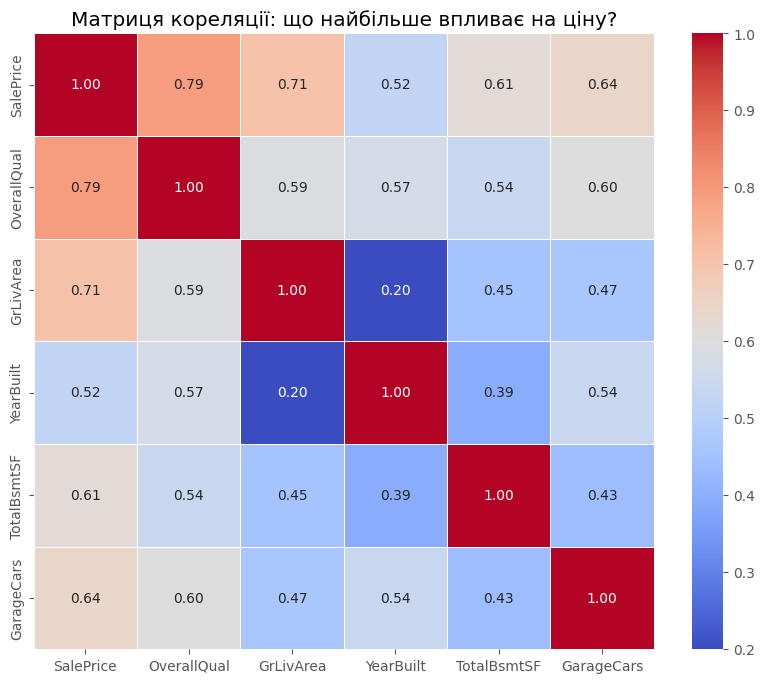

In [61]:
# Вибираємо основні числові колонки для аналізу
query_corr = """
SELECT
    SalePrice,
    OverallQual,
    GrLivArea,
    YearBuilt,
    TotalBsmtSF,
    GarageCars
FROM `house-market-analysis-482812.real_estate_analysis.house_prices_final`
"""
df_corr = client.query(query_corr).to_dataframe()

#  Рахуємо кореляцію
correlation_matrix = df_corr.corr()

# Будуємо "Теплову карту" (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Матриця кореляції: що найбільше впливає на ціну?')
plt.show()

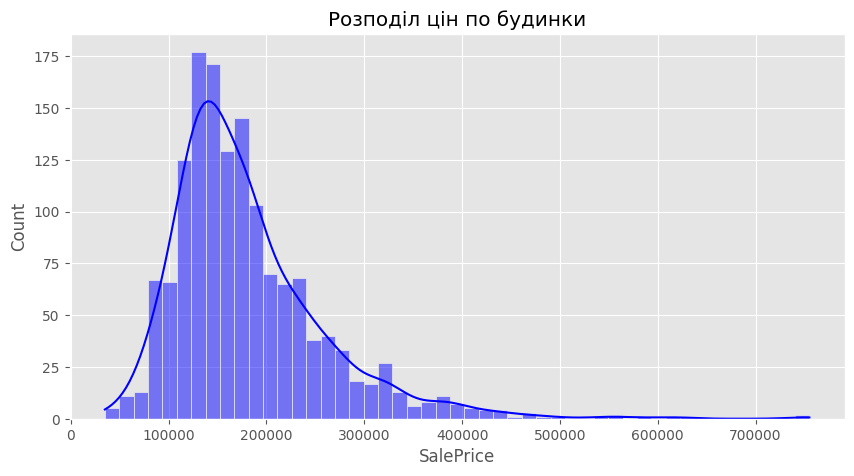

In [64]:
#Гістограма цін
# Допомагає зрозуміти: "Яка ціна зустрічається найчастіше?"
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_df['SalePrice'], kde=True, color='blue')
plt.title('Розподіл цін по будинки')
plt.savefig('visual_1_distribution.png')

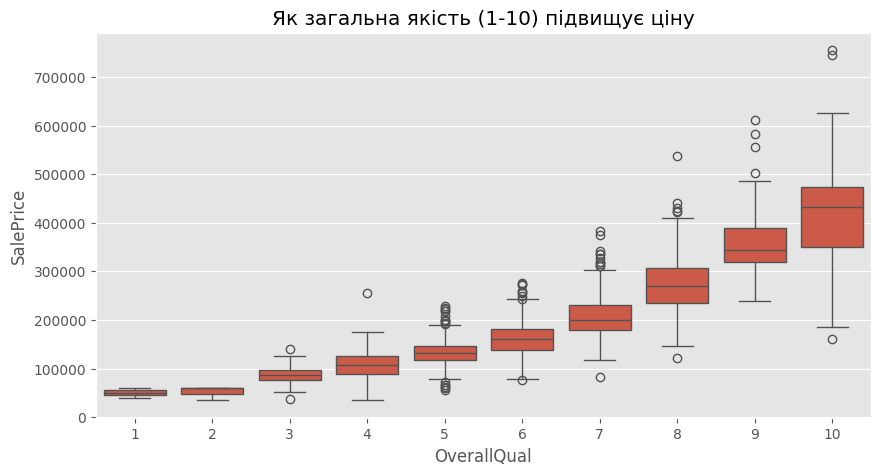

In [66]:
#Якість проти Ціни
# Допомагає побачити: "Чи справді дорожчі будинки мають вищу якість?"
plt.figure(figsize=(10, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=cleaned_df)
plt.title('Як загальна якість (1-10) підвищує ціну')
plt.savefig('visual_2_quality.png')

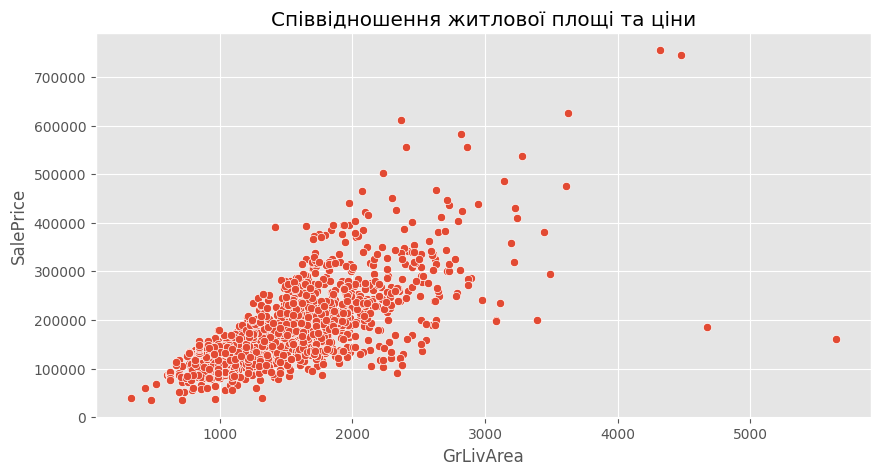

In [67]:
#Площа проти Ціни
# Допомагає знайти "дивацтва": наприклад, величезний будинок, який чомусь коштує дешево.
plt.figure(figsize=(10, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=cleaned_df)
plt.title('Співвідношення житлової площі та ціни')
plt.savefig('visual_3_area.png')

/tmp/ipython-input-2949094535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nb_prices.index, y=nb_prices.values, palette='magma')


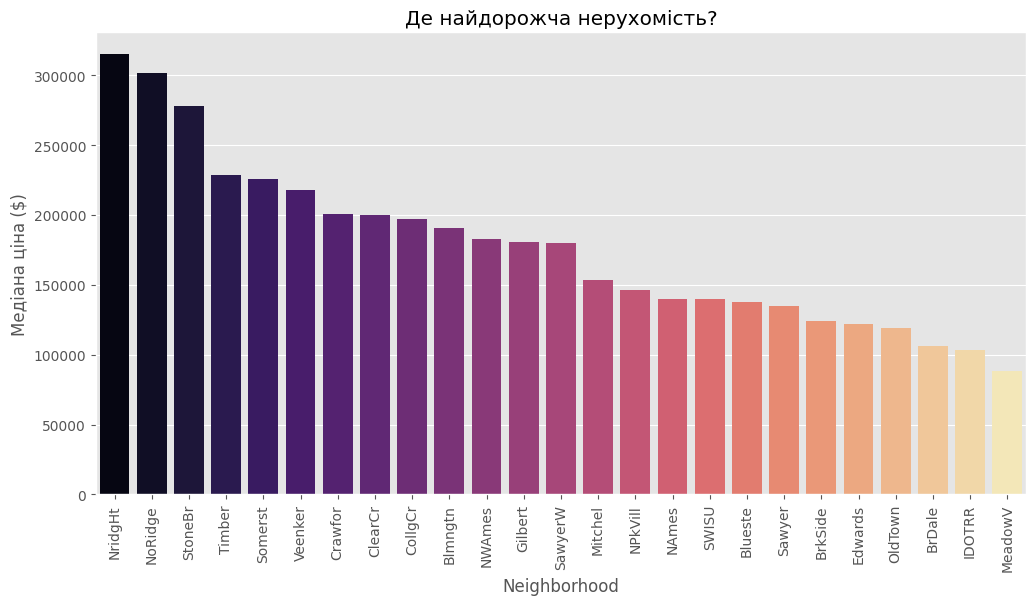

In [70]:
    #Аналіз районів (Neighborhood)
# 1. Групуємо дані за районами і рахуємо медіанну ціну
# Ми беремо саме МЕДІАНУ, бо вона краще показує реальність, і уникає викидів (аномалій)
# якщо в районі є один супер-дорогий палац.
nb_prices = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)

# 2. Будуємо графік, щоб побачити різницю наочно
plt.figure(figsize=(12, 6))
sns.barplot(x=nb_prices.index, y=nb_prices.values, palette='magma')
plt.xticks(rotation=90) # Повертаємо назви районів, щоб вони не налізали одна на одну
plt.title('Де найдорожча нерухомість?')
plt.ylabel('Медіана ціна ($)')
plt.savefig('neighborhood_analysis.png')